**Predictive Analytics Harga Berlian**

Dataset: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset

# **Data Loading**

Impor library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

from google.colab import files
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [2]:
!pip install -q kaggle

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fauzanbyu","key":"6315917ff5833a191af787ea7c399e2b"}'}

In [4]:
# Memuat dataset
!mkdir DiamondsData
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d shivam2503/diamonds -p /content/DiamondsData/

  0% 0.00/733k [00:00<?, ?B/s]
100% 733k/733k [00:00<00:00, 143MB/s]


In [5]:
# Mengekstraksi file zip dataset
!unzip '/content/DiamondsData/diamonds.zip' -d /content/DiamondsData/

Archive:  /content/DiamondsData/diamonds.zip
  inflating: /content/DiamondsData/diamonds.csv  


In [6]:
# Memuat dan menampilkan DataFrame
dataset_diamonds = pd.read_csv('/content/DiamondsData/diamonds.csv')
dataset_diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Dari output diatas dapat diketahui terdapat 53.940 baris (records atau jumlah pengamatan) dalam dataset dan terdapat 10 kolom yaitu: carat, cut, color, clarity, depth, table, price, x, y, z.

# **Exploratory Data Analysis - Deskripsi Variabel**

Berdasarkan informasi dari [Kaggle](https://www.kaggle.com/datasets/shivam2503/diamonds), variabel-variabel pada Diamond dataset adalah sebagai berikut:

- price: adalah harga dalam dolar Amerika Serikat ($), fitur ini merupakan fitur target pada proyek ini.
- carat: merepresentasikan bobot (weight) dari diamonds (0.2-5.01), digunakan sebagai ukuran dari batu permata dan perhiasan.
- cut: merepresentasikan kualitas pemotongan diamonds (Fair, Good, Very Good, Premium, and Ideal).
- color: merepresentasikan warna, dari J (paling buruk) ke D (yang terbaik).
- clarity: merepresentasikan seberapa jernih diamonds (I1 (paling buruk), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (terbaik))
- x: merepresentasikan panjang diamonds dalam mm (0-10.74).
- y: merepresentasikan lebar diamonds dalam mm (0-58.9).
- z: merepresentasikan kedalaman diamonds dalam mm (0-31.8).
- depth: merepresentasikan z/mean(x, y) = 2 * z/(x + y) (43-79).
- table: merepresentasikan lebar bagian atas berlian relatif terhadap titik terlebar 43-95).

In [7]:
# Cek informasi pada dataset
dataset_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Dari output diatas terlihat bahwa:

- Terdapat 3 kolom/fitur dengan tipe object, yaitu: cut, color, dan clarity. Fitur ini merupakan categorical features (fitur non-numerik).
- Terdapat 6 fitur numerik dengan tipe data float64 yaitu: carat, depth, table, x, y, dan z. Ini merupakan fitur numerik yang merupakan hasil pengukuran secara fisik.
- Terdapat 1 fitur numerik dengan tipe data int64, yaitu: price. fitur ini merupakan fitur target.

In [8]:
# Cek deskripsi statistik
dataset_diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Dari output diatas, nilai minimum untuk kolom x, y, dan z adalah 0. x, y, dan z adalah ukuran panjang, lebar, dan kedalaman diamonds sehingga tidak mungkin ada diamonds dengan dimensi x, y, atau z bernilai 0. Hal ini bisa jadi merupakan data yang tidak valid atau missing value.

# **Exploratory Data Analysis - Menangani Missing Value**

In [9]:
# Cek missing value pada kolom x, y, dan z
x = (dataset_diamonds.x == 0).sum()
y = (dataset_diamonds.y == 0).sum()
z = (dataset_diamonds.z == 0).sum()

print("Total nilai 0 dikolom x: ", x)
print("Total nilai 0 dikolom y: ", y)
print("Total nilai 0 dikolom z: ", z)

Total nilai 0 dikolom x:  8
Total nilai 0 dikolom y:  7
Total nilai 0 dikolom z:  20


Mengecek apakah data bernilai 0 pada salah satu dimensi juga terdapat pada dimensi lain.

In [10]:
# Mengecek dari kolom z yang memiliki jumlah missing value terbanyak
dataset_diamonds.loc[(dataset_diamonds['z']==0)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Dari output diatas, seluruh data bernilai 0 pada dimensi x dan y juga memiliki nilai 0 pada dimensi z.

In [11]:
# Drop baris dengan nilai 'x', 'y', dan 'z' = 0
dataset_diamonds = dataset_diamonds.loc[(dataset_diamonds[['x', 'y', 'z']]!=0).all(axis=1)]

# Cek ukuran data untuk memastikan baris sudah di-drop
dataset_diamonds.shape

(53920, 11)

Memastikan tidak ada nilai 0 lagi pada kolom x, y, dan z.

In [12]:
dataset_diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Dari output diatas, diketahui sudah tidak ada nilai 0 lagi pada kolom x, y, dan z.

# **Menangani Outliers**

Memvisualisasikan data Diamonds dengan boxplot untuk mendeteksi outliers pada fitur numerik.

**- Fitur carat**


<Axes: xlabel='carat'>

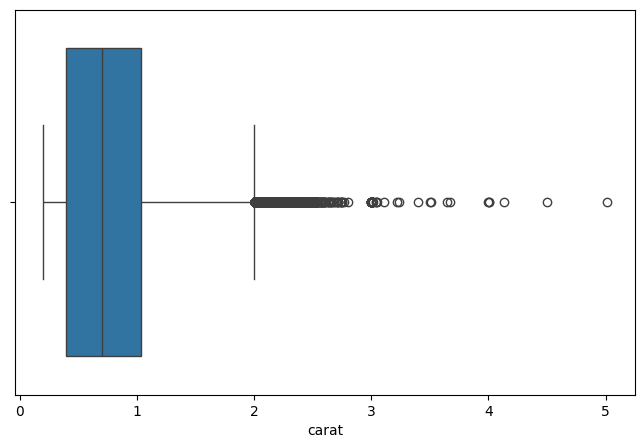

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=dataset_diamonds['carat'])

**- Fitur depth**

<Axes: xlabel='depth'>

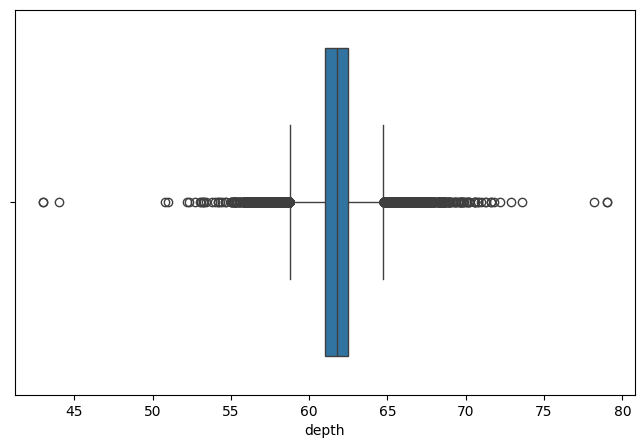

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=dataset_diamonds['depth'])

**- Fitur table**

<Axes: xlabel='table'>

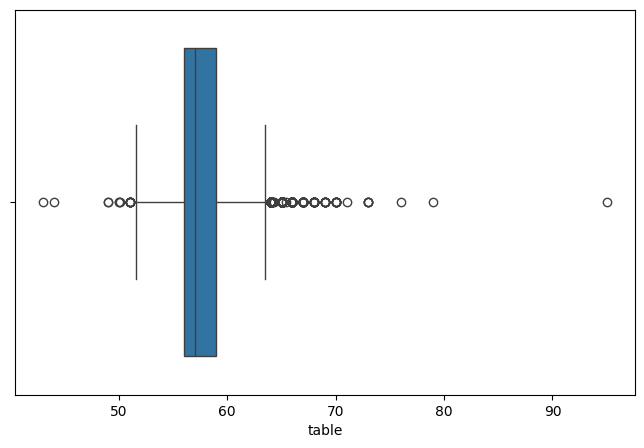

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=dataset_diamonds['table'])

**- Fitur x**

<Axes: xlabel='x'>

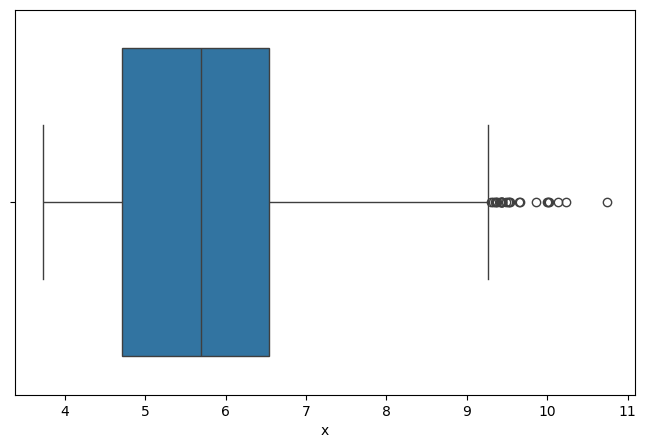

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=dataset_diamonds['x'])

**- Fitur y**

<Axes: xlabel='y'>

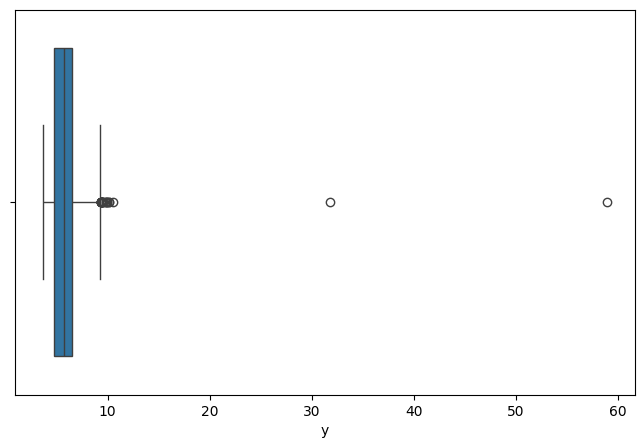

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=dataset_diamonds['y'])

**- Fitur z**

<Axes: xlabel='z'>

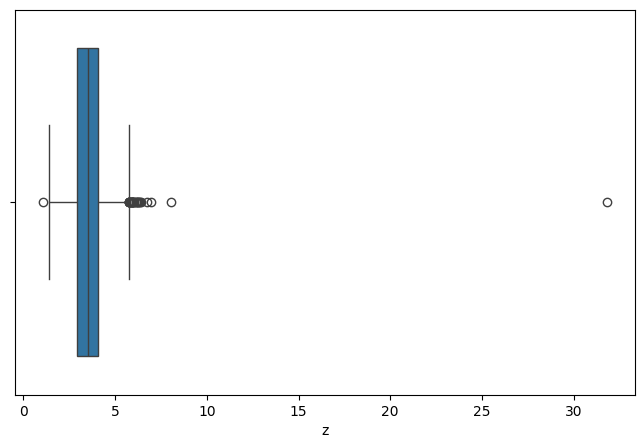

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=dataset_diamonds['z'])

Diketahui dari output visualisasi data Diamond diatas, terdapat outliers pada semua fitur yang divisualisasikan diatas, sehingga dalam menangani outliers tersebut digunakan metode IQR dengan membuat batas bawah dan batas atas dengan persamaan:

Batas bawah = Q1 - 1.5 * IQR

Batas atas = Q3 + 1.5 * IQR

In [19]:
# Mengatasi outliers dengan metode IQR
Q1 = pd.Series(dataset_diamonds.quantile(0.25, numeric_only=True), index=dataset_diamonds.columns)
Q3 = pd.Series(dataset_diamonds.quantile(0.75, numeric_only=True), index=dataset_diamonds.columns)
IQR = Q3 - Q1
dataset_diamonds = dataset_diamonds[~((dataset_diamonds < (Q1 - 1.5 * IQR)) | (dataset_diamonds > (Q3 + 1.5 * IQR))).any(axis=1)]

# Cek ukuran dataset setelah drop outliers
dataset_diamonds.shape

(47524, 11)

## **Hasil Penanganan Outliers**

**- Fitur carat**

<Axes: xlabel='carat'>

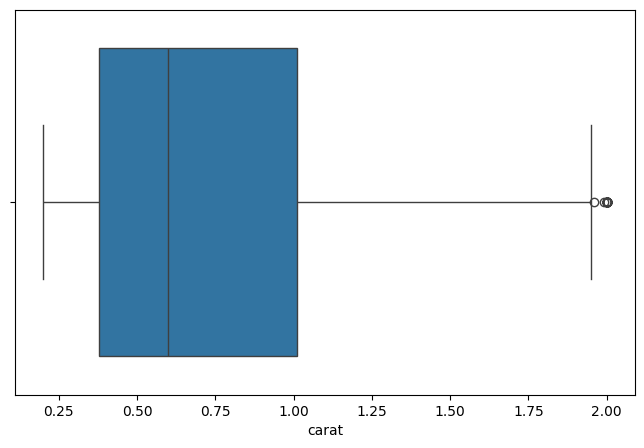

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=dataset_diamonds['carat'])

**- Fitur depth**

<Axes: xlabel='depth'>

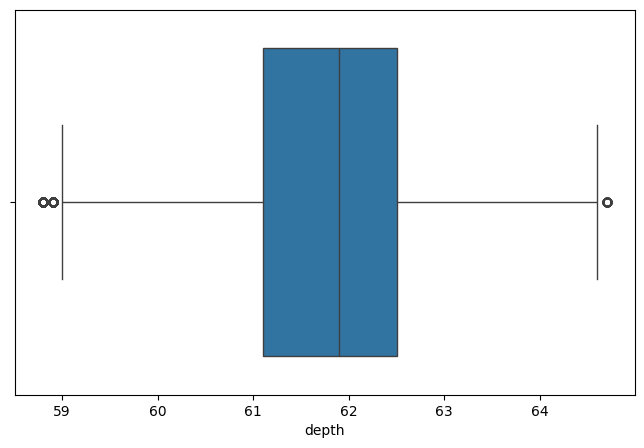

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=dataset_diamonds['depth'])

**- Fitur table**

<Axes: xlabel='table'>

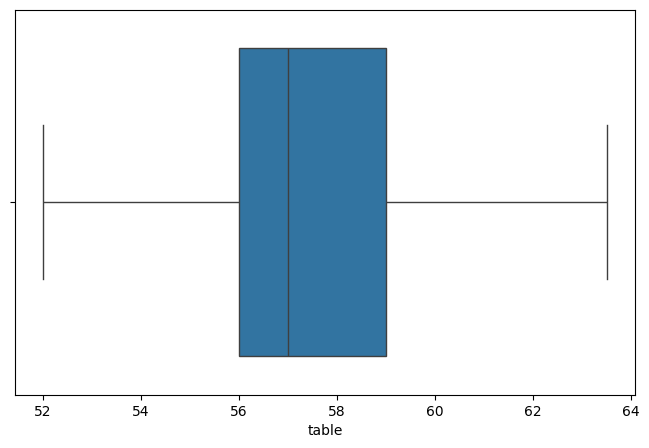

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=dataset_diamonds['table'])

**- Fitur x**

<Axes: xlabel='x'>

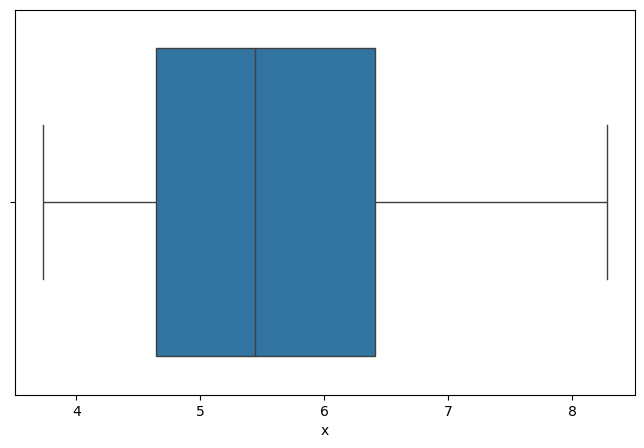

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=dataset_diamonds['x'])

**- Fitur y**

<Axes: xlabel='y'>

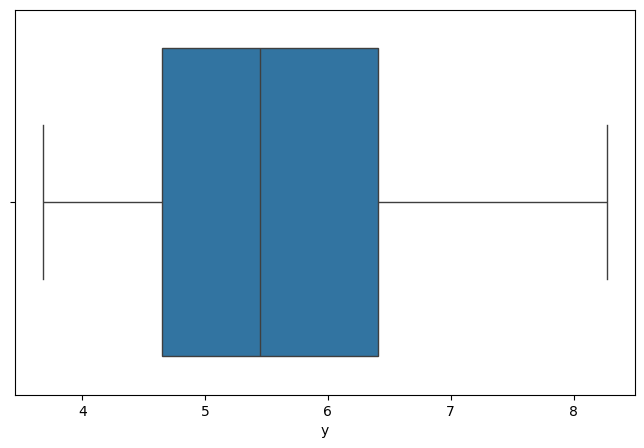

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=dataset_diamonds['y'])

**- Fitur z**

<Axes: xlabel='z'>

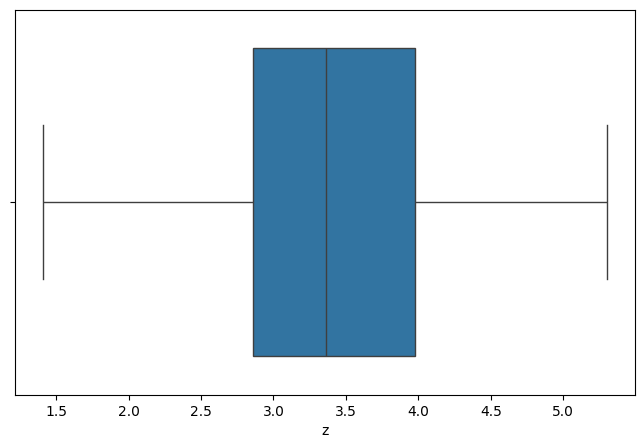

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=dataset_diamonds['z'])

# **Exploratory Data Analysis - Univariate Analysis**

Membagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [26]:
# Membagi fitur pada dataset
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

## **Categorical Features**

**Fitur Cut**

           jumlah sampel  persentase
Ideal              20340        42.8
Premium            12115        25.5
Very Good          10994        23.1
Good                3745         7.9
Fair                 330         0.7


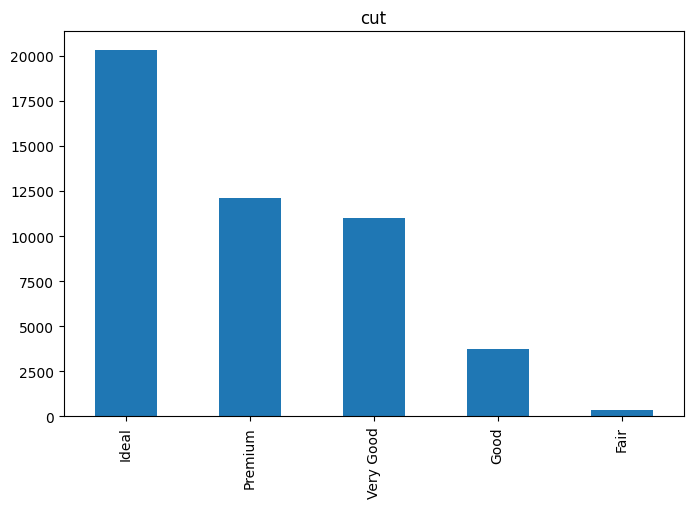

In [27]:
# Memvisualisasikan categorical feature cut
plt.figure(figsize=(8, 5))
feature = categorical_features[0]
count = dataset_diamonds[feature].value_counts()
percent = 100*dataset_diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Terdapat 5 kategori pada fitur Cut, secara berurutan dari jumlahnya yang paling banyak yaitu: Ideal, Premium, Very Good, Good, dan Fair. Dari data persentase dapat disimpulkan bahwa lebih dari 60% sampel merupakan diamonds tipe grade tinggi, yaitu grade Ideal dan Premium.

**Fitur Color**

   jumlah sampel  persentase
G          10081        21.2
E           8910        18.7
F           8466        17.8
H           7176        15.1
D           6195        13.0
I           4462         9.4
J           2234         4.7


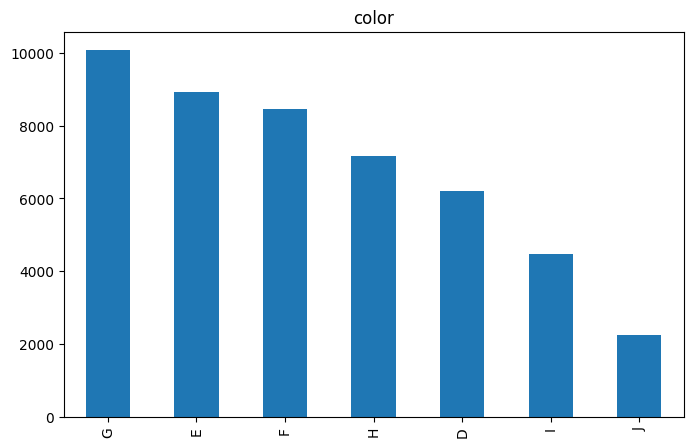

In [28]:
# Memvisualisasikan categorical feature color
plt.figure(figsize=(8, 5))
feature = categorical_features[1]
count = dataset_diamonds[feature].value_counts()
percent = 100*dataset_diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Pada bagian Deskripsi Variabel sebelumnya didapatkan informasi bahwa kualitas warna dari yang paling buruk ke yang paling bagus adalah J, I, H, G, F, E, dan D. Maka berdasarkan output grafik diatas dapat disimpulkan bahwa sebagian besar grade berada pada grade menengah, yaitu G, F, E.

**Fitur Clarity**

      jumlah sampel  persentase
SI1           11552        24.3
VS2           10928        23.0
SI2            7402        15.6
VS1            7373        15.5
VVS2           4683         9.9
VVS1           3463         7.3
IF             1650         3.5
I1              473         1.0


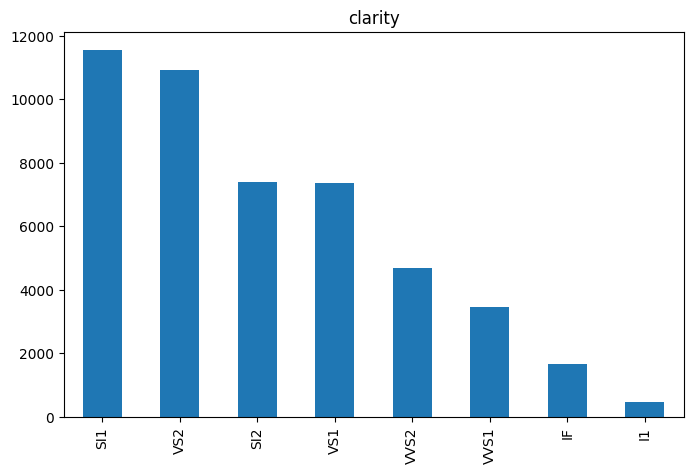

In [29]:
# Memvisualisasikan categorical feature clarity
plt.figure(figsize=(8, 5))
feature = categorical_features[2]
count = dataset_diamonds[feature].value_counts()
percent = 100*dataset_diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

- IF = Internally Flawless (Terbaik)
- VVS2 = Very Very Slight Inclusions
- VVS1 = Very Very Slight Inclusions
- VS1 = Very Slight Inclusions
- VS2 = Very Slight Inclusions
- SI2 = Slight Inclusions
- SI1 = Slight Inclusions
- I1 = Imperfect (Terburuk)

Dari output grafik diatas dapat disimpulkan bahwa sebagian besar fitur merupakan grade rendah, yaitu SI1, SI2, dan VS2.

## **Numerical Features**

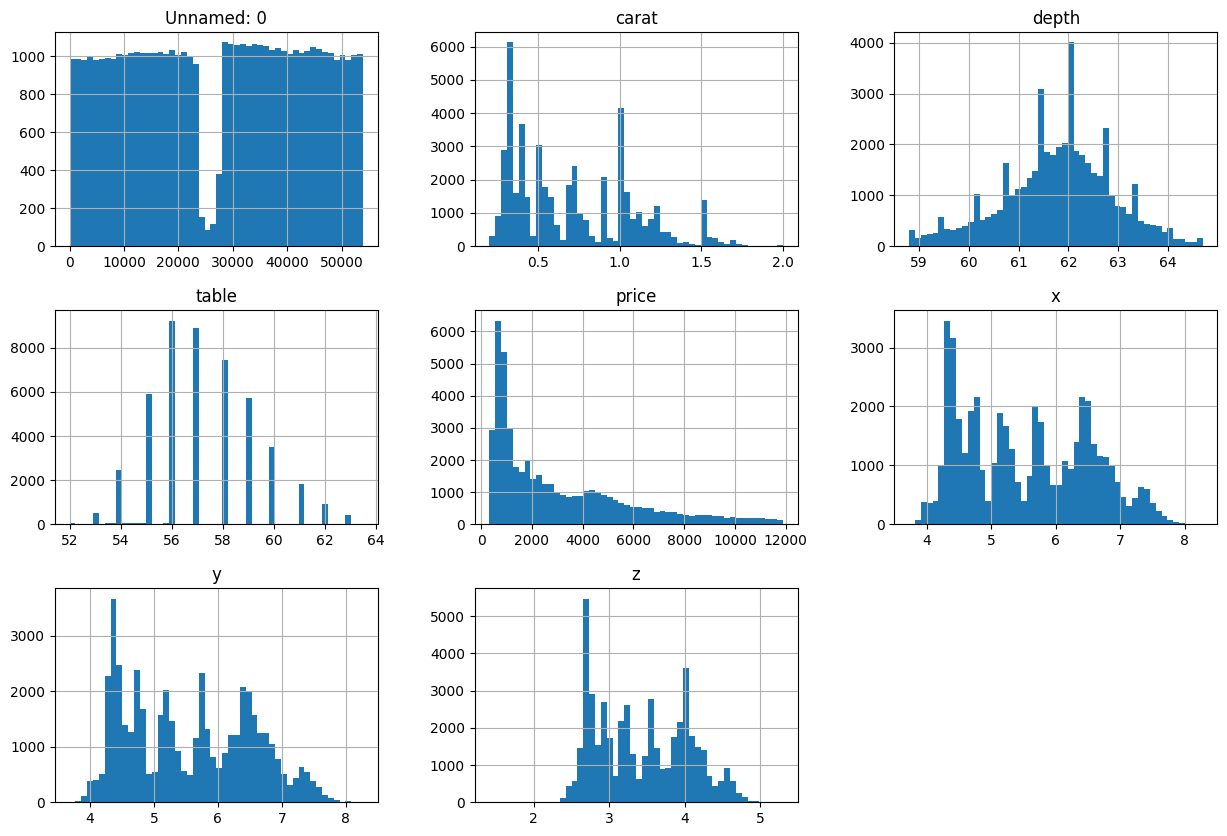

In [30]:
# Menampilkan histogram pada masing-masing numerical features
dataset_diamonds.hist(bins=50, figsize=(15,10))
plt.show()

Dari histogram "price" yang merupakan target fitur, diperoleh beberapa informasi, antara lain:

- Peningkatan harga diamonds sebanding dengan penurunan jumlah sampel. Dilihat jelas dari histogram "price" yang grafiknya mengalami penurunan seiring dengan semakin banyaknya jumlah sampel (sumbu x).
- Rentang harga diamonds cukup tinggi yaitu dari skala ratusan dolar Amerika hingga sekitar \$11800.
- Setengah harga berlian bernilai dibawah \$2500.
- Distribusi harga miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model.

# **Exploratory Data Analysis - Multivariate Analysis**

## **Categorical Features**

Mengecek rata-rata harga terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap harga.

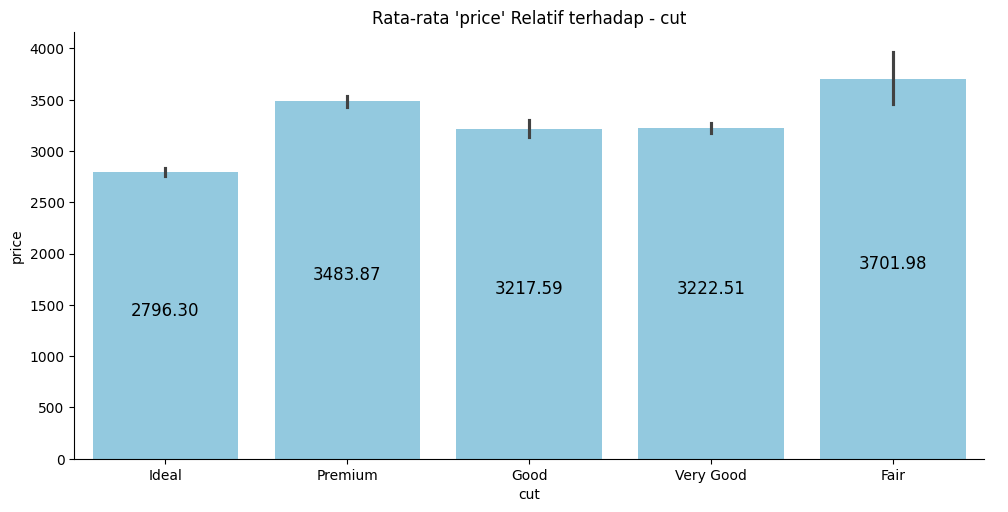

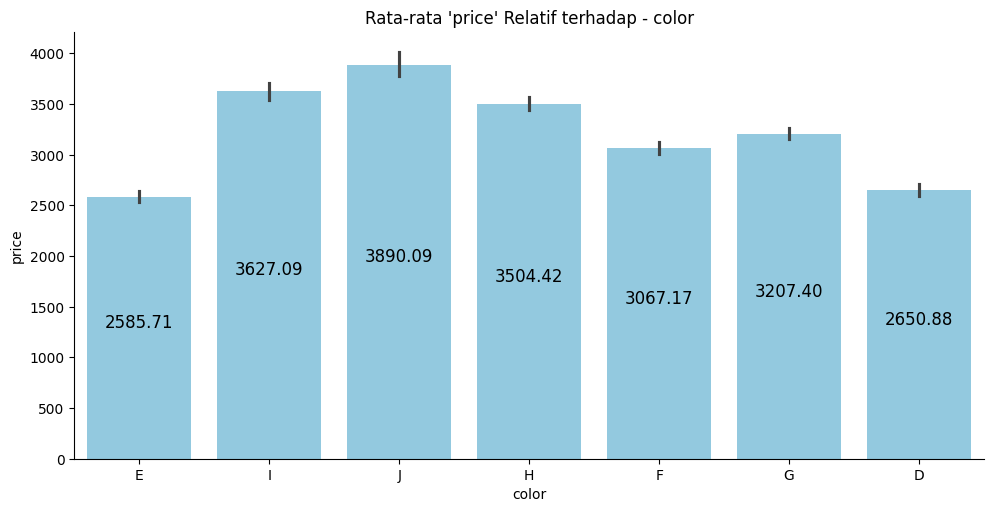

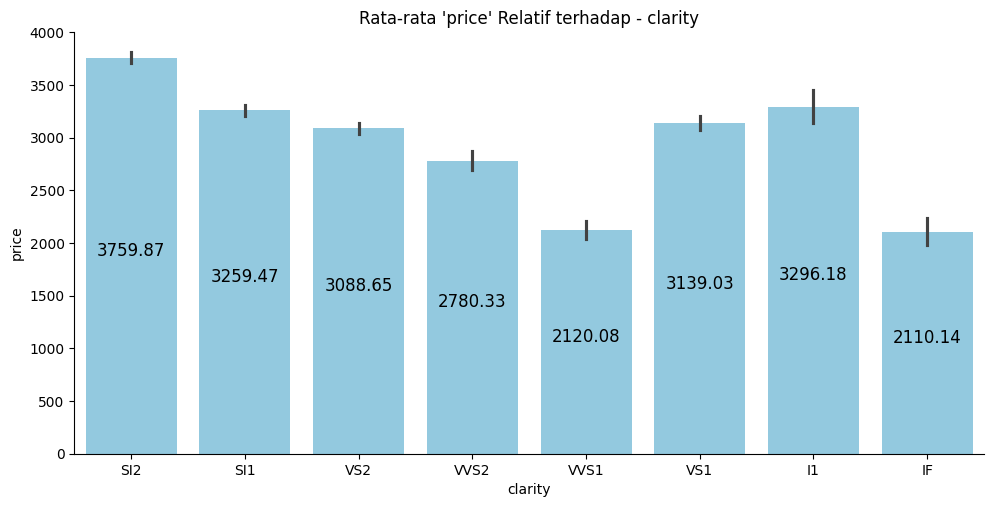

In [31]:
# Mengecek rata-rata harga terhadap masing-masing fitur
cat_features = dataset_diamonds.select_dtypes(include='object').columns.to_list()

for col in cat_features:
    catplot = sns.catplot(x=col, y='price', kind='bar', dodge=False, height=5, aspect=2, data=dataset_diamonds, color='skyblue')
    plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

    # Menambahkan label nilai pada setiap bar
    ax = catplot.ax
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height()/2, '{0:.2f}'.format(p.get_height()),
                fontsize=12, color='black', ha='center')

    plt.show()


Dengan mengamati rata-rata harga relatif terhadap fitur kategori diatas, dapat diketahui informasi sebagai berikut:

- Pada fitur cut, rata-rata harga cenderung mirip. Rentangnya berada antara \$3500 hingga \$4500. Grade tertinggi yaitu grade Ideal memiliki harga rata-rata terendah diantara grade lainnya. Sehingga, fitur cut memiliki pengaruh atau dampak yang kecil terhadap rata-rata harga.
- Pada fitur color, semakin rendah grade warna, harga diamonds justru semakin tinggi harga. Dari sini dapat disimpulkan bahwa warna memiliki pengaruh yang rendah terhadap harga.
- Pada fitur clarity, secara umum, diamond dengan grade lebih rendah memiliki harga yang lebih tinggi. Hal ini berarti bahwa fitur clarity memiliki pengaruh yang rendah terhadap harga.

Berdasarkan hal itu, dapat diketahui bahwa fitur kategori memiliki pengaruh yang rendah terhadap harga.


## **Numerical Features**

Melihat hubungan antar fitur numerik.

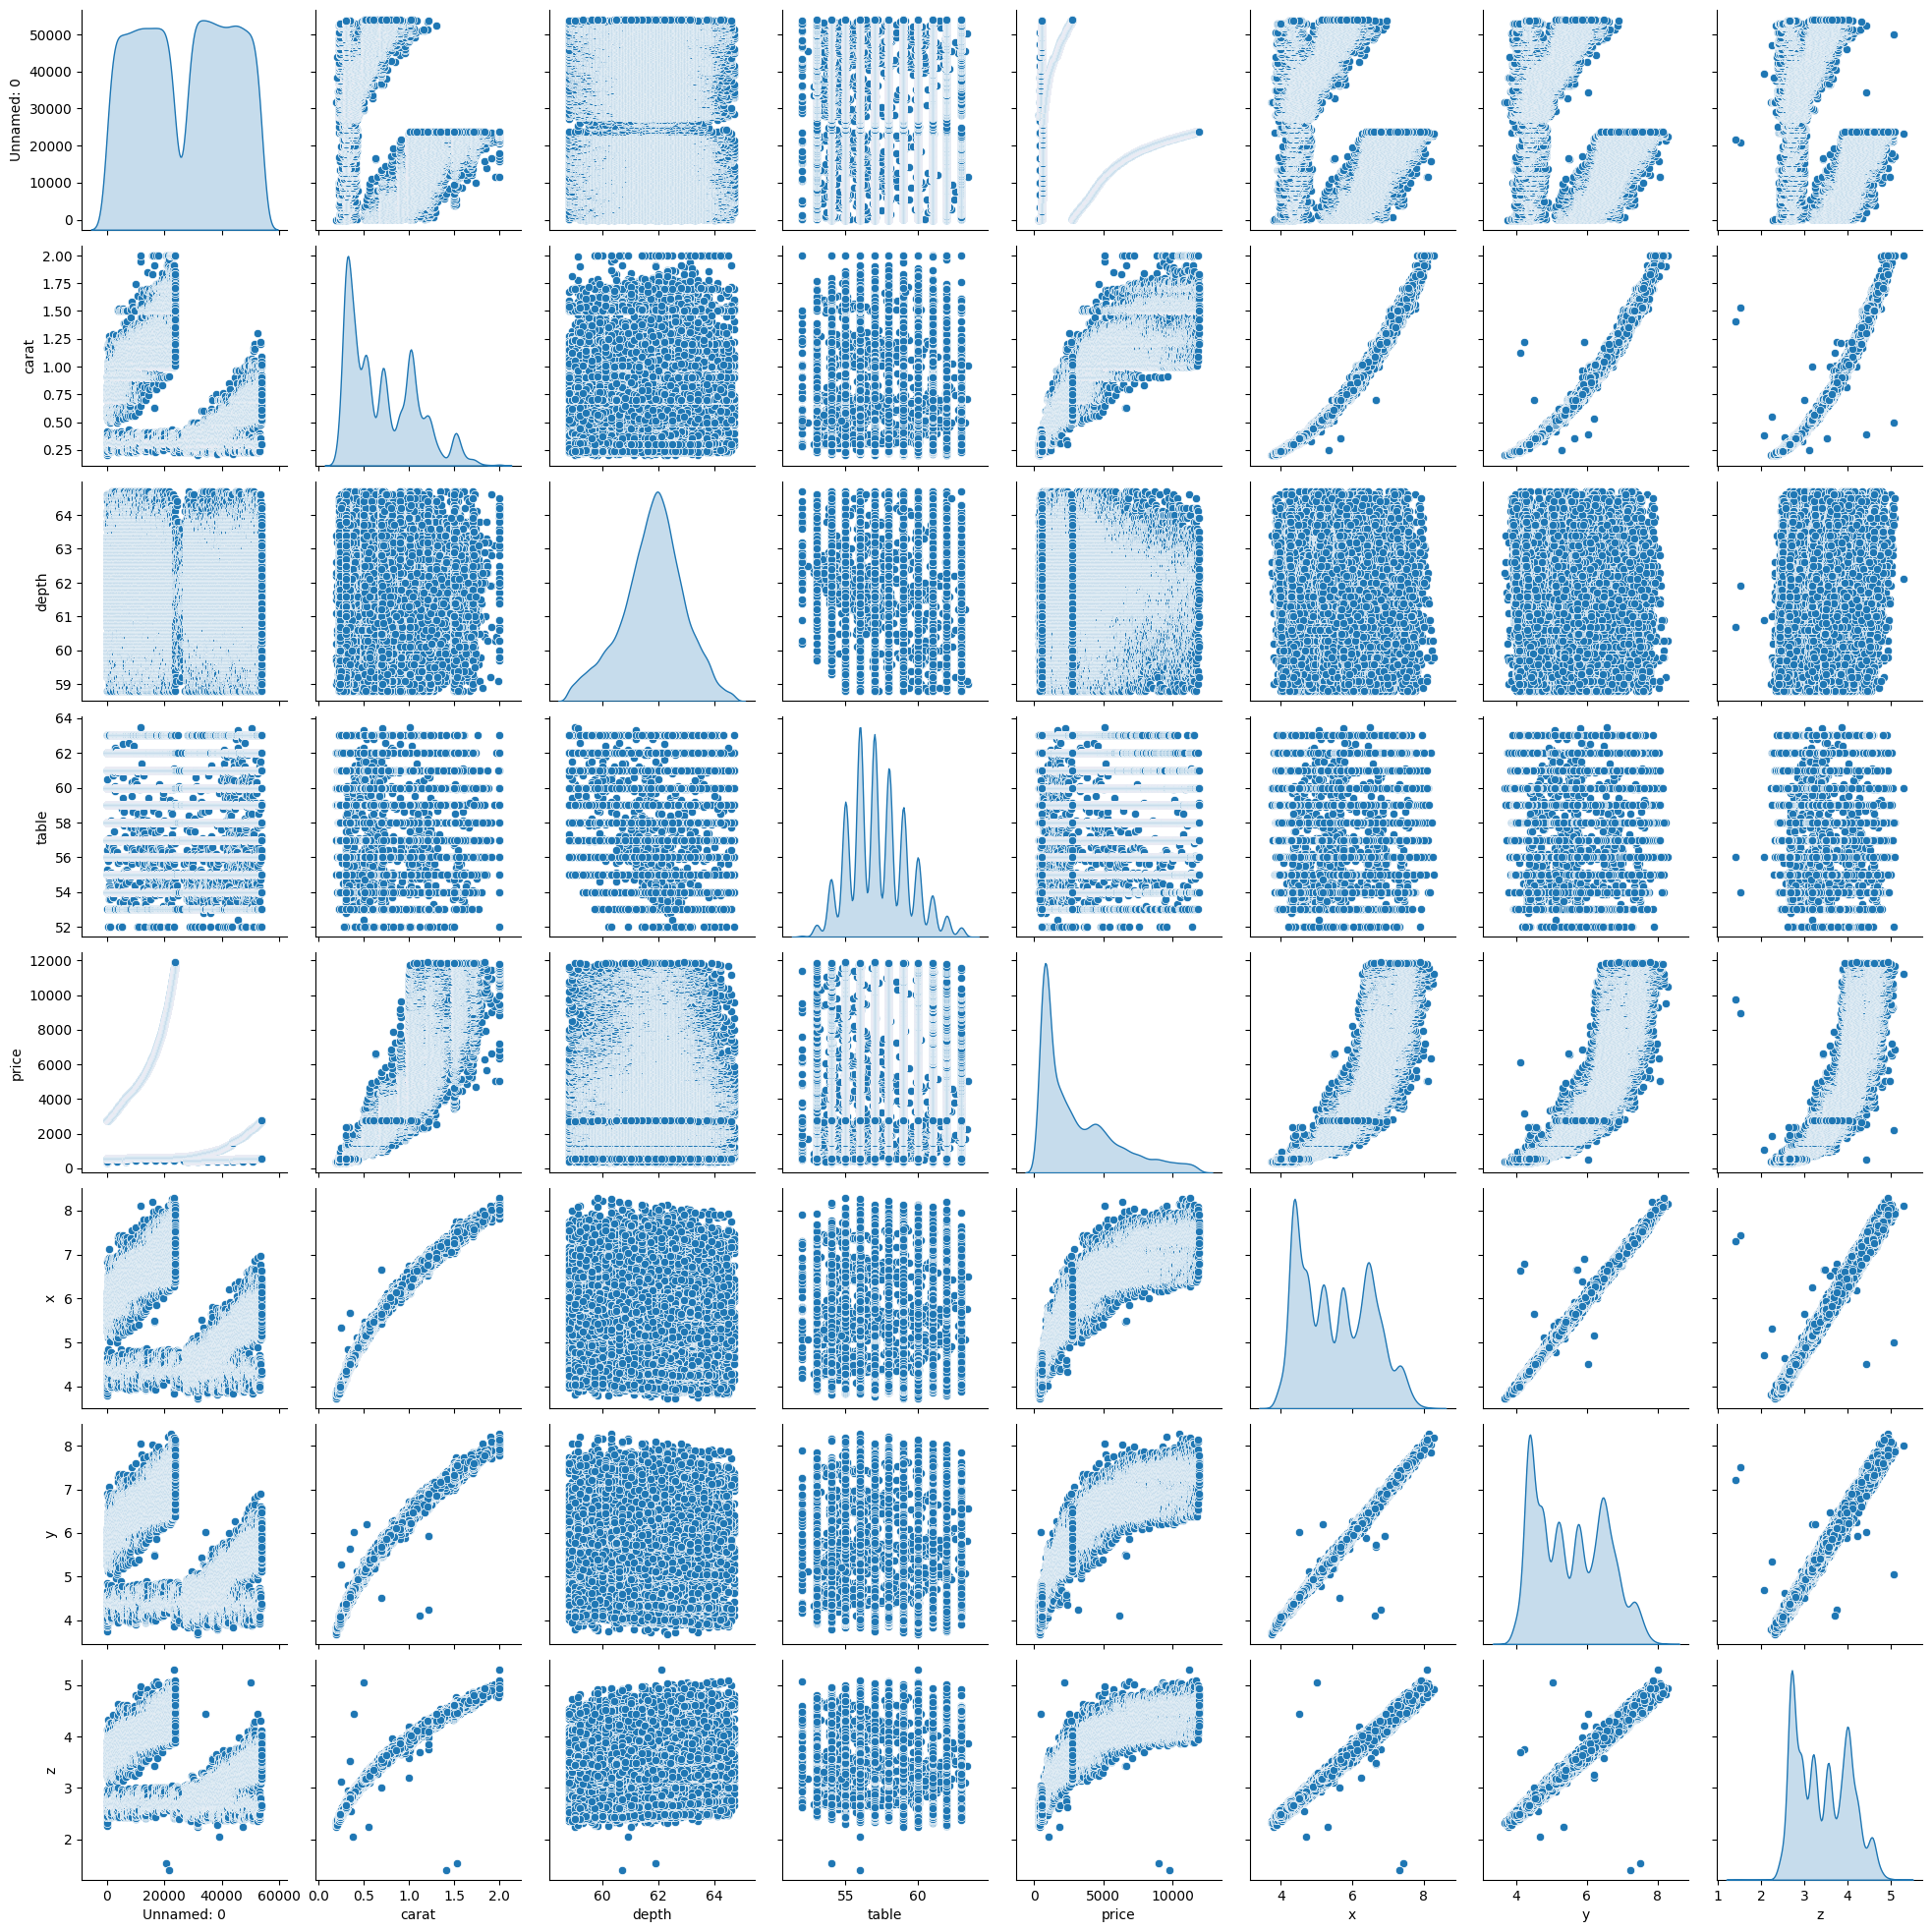

In [32]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(dataset_diamonds, diag_kind = 'kde')

Pada pola sebaran data grafik pairplot diatas, terlihat fitur carat, x, y, dan z memiliki korelasi yang tinggi dengan fitur price. Sedangkan kedua fitur lainnya yaitu depth dan table terlihat memiliki korelasi yang lemah karena sebarannya tidak membentuk pola.

Menampilkan korelasi antar fitur numerik

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

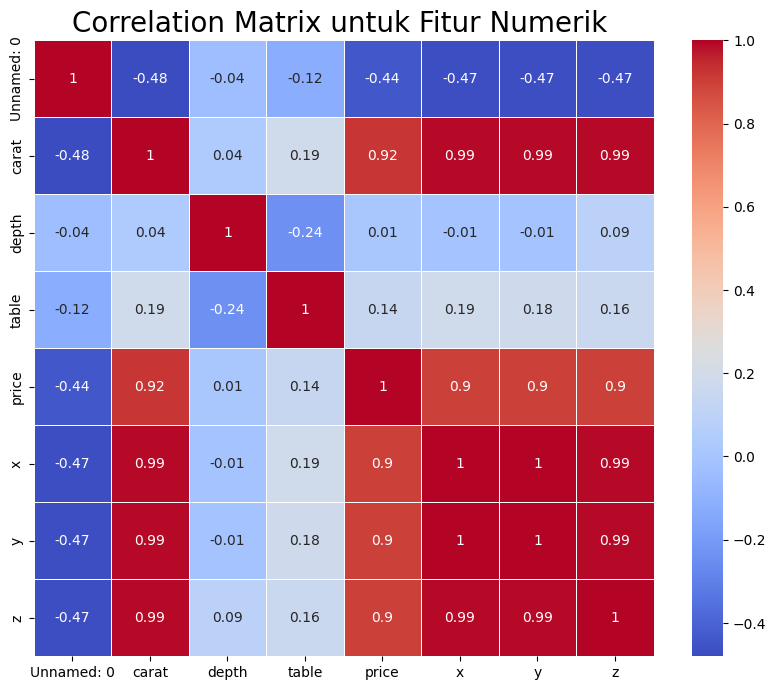

In [33]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataset_diamonds.corr(numeric_only=True).round(2)

# Untuk menampilkan nilai didalam kotak
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Pada grafik korelasi diatas. Fitur carat, x, y, dan z memiliki skor korelasi yang besar (di atas 0.9) dengan fitur target price. Artinya, fitur price berkorelasi tinggi dengan keempat fitur tersebut. Sementara itu, fitur depth memiliki korelasi yang sangat kecil (0.01). Sehingga, fitur tersebut akan dihapus.

In [34]:
dataset_diamonds.drop(['depth'], inplace=True, axis=1)
dataset_diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
3,4,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,57.0,336,3.94,3.96,2.48


# **Data Preparation**

Melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan.

## **Encoding Fitur Kategori**

Menggunakan teknik one-hot-encoding untuk melakukan proses encoding dengan fitur get_dummies sehingga variabel kategori berubah menjadi variabel numerik.

In [35]:
dataset_diamonds = pd.concat([dataset_diamonds, pd.get_dummies(dataset_diamonds['cut'], prefix='cut')],axis=1)
dataset_diamonds = pd.concat([dataset_diamonds, pd.get_dummies(dataset_diamonds['color'], prefix='color')],axis=1)
dataset_diamonds = pd.concat([dataset_diamonds, pd.get_dummies(dataset_diamonds['clarity'], prefix='clarity')],axis=1)
dataset_diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)
dataset_diamonds.head()

,Unnamed: 0,carat,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,0.29,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,5,0.31,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
5,6,0.24,57.0,336,3.94,3.96,2.48,0,0,0,...,0,1,0,0,0,0,0,0,0,1


## **Reduksi Dimensi dengan PCA**

Mereduksi jumlah fitur dengan tetap mempertahankan informasi pada data menggunakan Principal Component Analysis (PCA).

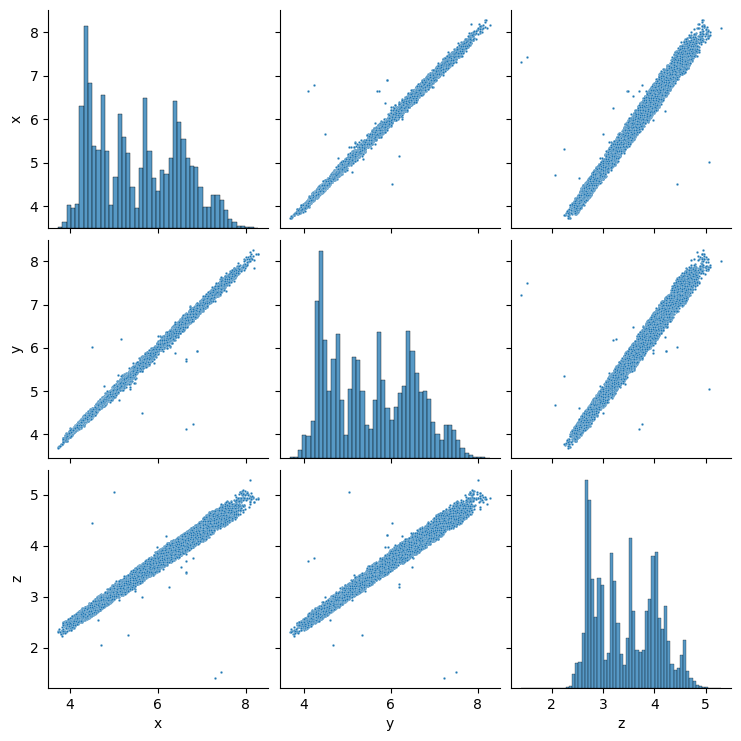

In [36]:
sns.pairplot(dataset_diamonds[['x','y','z']], plot_kws={"s": 3});

Berdasarkan plot diatas, ketiga fitur ukuran diamonds dalam kolom x, y, dan z memiliki korelasi yang tinggi. Hal ini karena ketiga fitur ini memiliki informasi yang sama, yaitu ukuran diamonds.

PCA digunakan karena variabel dalam data memiliki korelasi yang tinggi. Korelasi tinggi ini menunjukkan data yang berulang atau redundant, maka dari itu teknik PCA digunakan untuk mereduksi variabel asli menjadi sejumlah kecil variabel baru yang tidak berkorelasi linier, disebut komponen utama (PC).

In [37]:
# Membuat objek PCA dengan mengatur jumlah komponen utama yang diinginkan (n_components)
pca = PCA(n_components=3, random_state=123)
pca.fit(dataset_diamonds[['x','y','z']])

# Mentransformasikan data untuk mendapatkan PC baru
princ_comp = pca.transform(dataset_diamonds[['x','y','z']])

Mengetahui proporsi informasi dari ketiga komponen.

In [38]:
pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

Membuat fitur baru bernama 'dimension' untuk menggantikan fitur 'x', 'y', dan'z'.

In [39]:
pca = PCA(n_components=1, random_state=123)
pca.fit(dataset_diamonds[['x','y','z']])
dataset_diamonds['dimension'] = pca.transform(dataset_diamonds.loc[:, ('x','y','z')]).flatten()
dataset_diamonds.drop(['x','y','z'], axis=1, inplace=True)

## **Train-Test-Split**

Melakukan pembagian dataset menjadi data latih (train) dan data uji (test) dengan mempertahankan sebagian data yang ada untuk menguji seberapa baik generalisasi model terhadap data baru. Pembagian data dilakukan sebelum proses transformasi data, sehingga dapat mengurangi potensi kebocoran data (data leakage). Dalam hal ini jumlah data sebesar 4.7524 akan dibagi dengan rasio 90:10 menjadi 4.2771 data latih dan 4.753 data uji.

In [40]:
# Split data
X = dataset_diamonds.drop(["price"],axis =1)
y = dataset_diamonds["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

Mengecek jumlah sampel pada masing-masing bagian.

In [41]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset :  {len(X_test)}')

Total # of sample in whole dataset: 47524
Total # of sample in train dataset: 42771
Total # of sample in test dataset :  4753


## **Standarisasi**

Untuk menghindari kebocoran informasi pada data uji, teknik StandardScaler dari library Scikitlearn digunakan dalam tahapan transformasi data numerical. Proses standarisasi mengubah nilai rata-rata (mean) menjadi 0 dan nilai standar deviasi menjadi 1.

In [42]:
# Melakukan standarisasi terhadap data latih
numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
536,-0.026226,0.864091,0.143464
21293,1.348407,1.359644,1.353588
45577,-0.511390,-0.622566,-0.372761
37379,-0.834833,-0.622566,-0.905790
38240,-0.861787,-0.622566,-0.813165


Mengecek nilai mean dan standar deviasi setelah proses standarisasi.

In [43]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,42771.0000,42771.0000,42771.0000
mean,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000
min,-1.3739,-2.6048,-1.8867
25%,-0.8887,-0.6226,-0.9283
50%,-0.2688,-0.1270,-0.1063
75%,0.8093,0.8641,0.8847
max,3.4777,3.0941,2.6998


# **Model Development**

Dalam mengembangkan model Machine Learning pada proyek ini digunakan 3 algoritma, yang kemudian akan dievaluasi performa dari masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik.

Pada tahap ini hanya melatih data training dan menyimpan data testing untuk tahap Evaluasi Model. Mean Squared Error juga digunakan sebagai metrik untuk mengevaluasi performa model.

In [44]:
# Menyiapkan DataFrame untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

## **Model Development dengan K-Nearest Neighbor (Regresi)**
KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat (dengan k adalah sebuah angka positif).

In [45]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

print('Score:', knn.score(X_test, y_test))

Score: 0.9720053443589446


Score algoritma KNN = 97%

## **Model Development dengan Random Forest**

Random Forest bekerja dengan membangun beberapa pohon keputusan (decision tree) selama pelatihan dan menggabungkan hasil prediksi dari pohon-pohon tersebut untuk mendapatkan prediksi yang lebih akurat dan stabil.

In [46]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

print('Score:', RF.score(X_test, y_test))

Score: 0.9879759860827304


- n_estimator: jumlah trees (pohon) di forest.
- max_depth: kedalaman atau panjang pohon.
- random_state: digunakan untuk mengontrol random number generator yang digunakan.
- n_jobs: jumlah job (pekerjaan) yang digunakan secara paralel. n_jobs = -1 artinya semua proses berjalan secara paralel.

Score algoritma Random Forest = 98%

## **Model Development dengan Boosting Algorithm**

Teknik boosting bekerja dengan membangun model dari data latih, kemudian membuat model kedua yang bertugas memperbaiki kesalahan dari model pertama. Model ditambahkan sampai data latih terprediksi dengan baik atau telah mencapai jumlah maksimum model untuk ditambahkan.

In [47]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)

models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

print('Score:', boosting.score(X_test, y_test))

Score: 0.9642084107439248


- learning_rate: bobot yang diterapkan pada setiap regressor di masing-masing proses iterasi boosting.
- random_state: digunakan untuk mengontrol random number generator yang digunakan.

Score algoritma Boosting = 96%

Sehingga dalam pembuatan model, performa terbaik ditunjukkan oleh algoritma Random Forest yang memiliki hasil akurasi sebesar 98%.

# **Evaluasi Model**

Metrik yang digunakan pada prediksi ini adalah MSE atau Mean Squared Error yang menghitung jumlah selisih kuadrat rata-rata nilai sebenarnya dengan nilai prediksi.

Sebelum menghitung nilai MSE dalam model, perlu dilakukan proses scaling fitur numerik pada data uji agar skala antara data latih dan data uji sama.

In [48]:
# Scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Mengevaluasi model KNN, RF, dan Boosting dengan metrik MSE.

In [49]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,71.394561,95.296801
RF,0.129931,0.502556
Boosting,266.088836,239.136266


Memvisualisasikan metrik MSE.

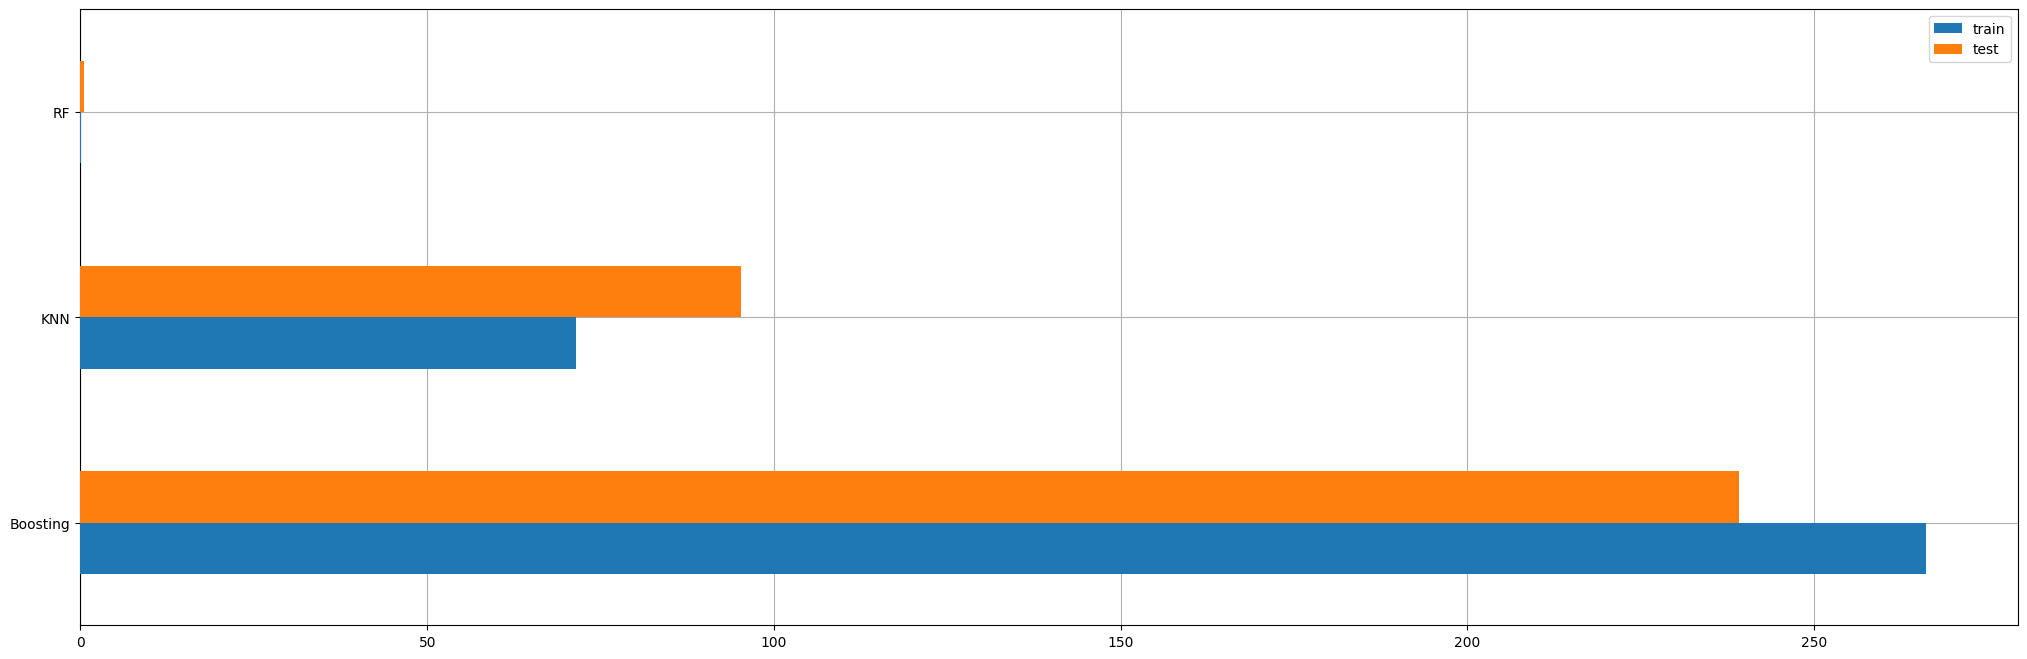

In [50]:
fig, ax = plt.subplots(figsize=(25, 8))
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)


Dari hasil plot metrik MSE diatas, terlihat bahwa algoritma model Random Forest (RF) memiliki hasil yang paling baik dibandingkan dengan algoritma model Boosting dan KNN. Hal ini ditunjukkan karena hasil pengujian model Random Forest memiliki nilai error terkecil dibandingkan dengan algoritma KNN yang memiliki angka error diatas 50, dan algoritma Boosting yang memiliki angka error diatas 200.

In [51]:
# Membuat prediksi dari data uji untuk melakukan pengujian
prediksi = X_test.iloc[3:4].copy()
pred_dict = {'y_true':y_test[3:4]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
1179,2930,2929.8,2930.1,3663.0


Terlihat bahwa prediksi dengan algoritma Random Forest (RF) pada kolom "prediksi_RF" memberikan nilai yang paling mendekati dengan nilai pada kolom "y_true".

In [52]:
# Membuat prediksi dari data uji untuk melakukan pengujian
prediksi = X_test.iloc[5:9].copy()
pred_dict = {'y_true':y_test[5:9]}
for name, model in model_dict.items():
  pred_dict['prediksi_' + name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
5769,3898,3897.9,3898.0,4524.5
35731,911,911.0,918.6,788.1
20428,8780,8783.2,8781.3,9146.2
52516,2528,2527.6,2527.4,1731.0
